In [3]:
# 김영삼도서관에서 가장 많이 대출되는 도서 년도별 Top 5 출력해보기! (2020~2024)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font',family='Malgun Gothic')
set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_10912\3962801771.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
xlsx = pd.read_excel("김영삼도서관 장서 대출목록 (2024년 04월).xlsx")
xlsx.to_csv("김영삼도서관 장서 대출목록 (2024년 04월).csv")

df = pd.read_csv("C:/Users/JunQuixote/OneDrive - 중앙대학교/문서/GitHub/2024-Tutorial/Tutorial/beginner/week4/김영삼도서관 장서 대출목록 (2024년 04월).csv", low_memory=False)

c:\Users\JunQuixote\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_10912\1909224557.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='대출건수', y='도서명', data=top_books, palette='viridis')
C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_10912\1909224557.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='대출건수', y='도서명', data=top_books, palette='viridis')
C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_10912\1909224557.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='대출건수', y='도서명', data=top_books, palette='vi

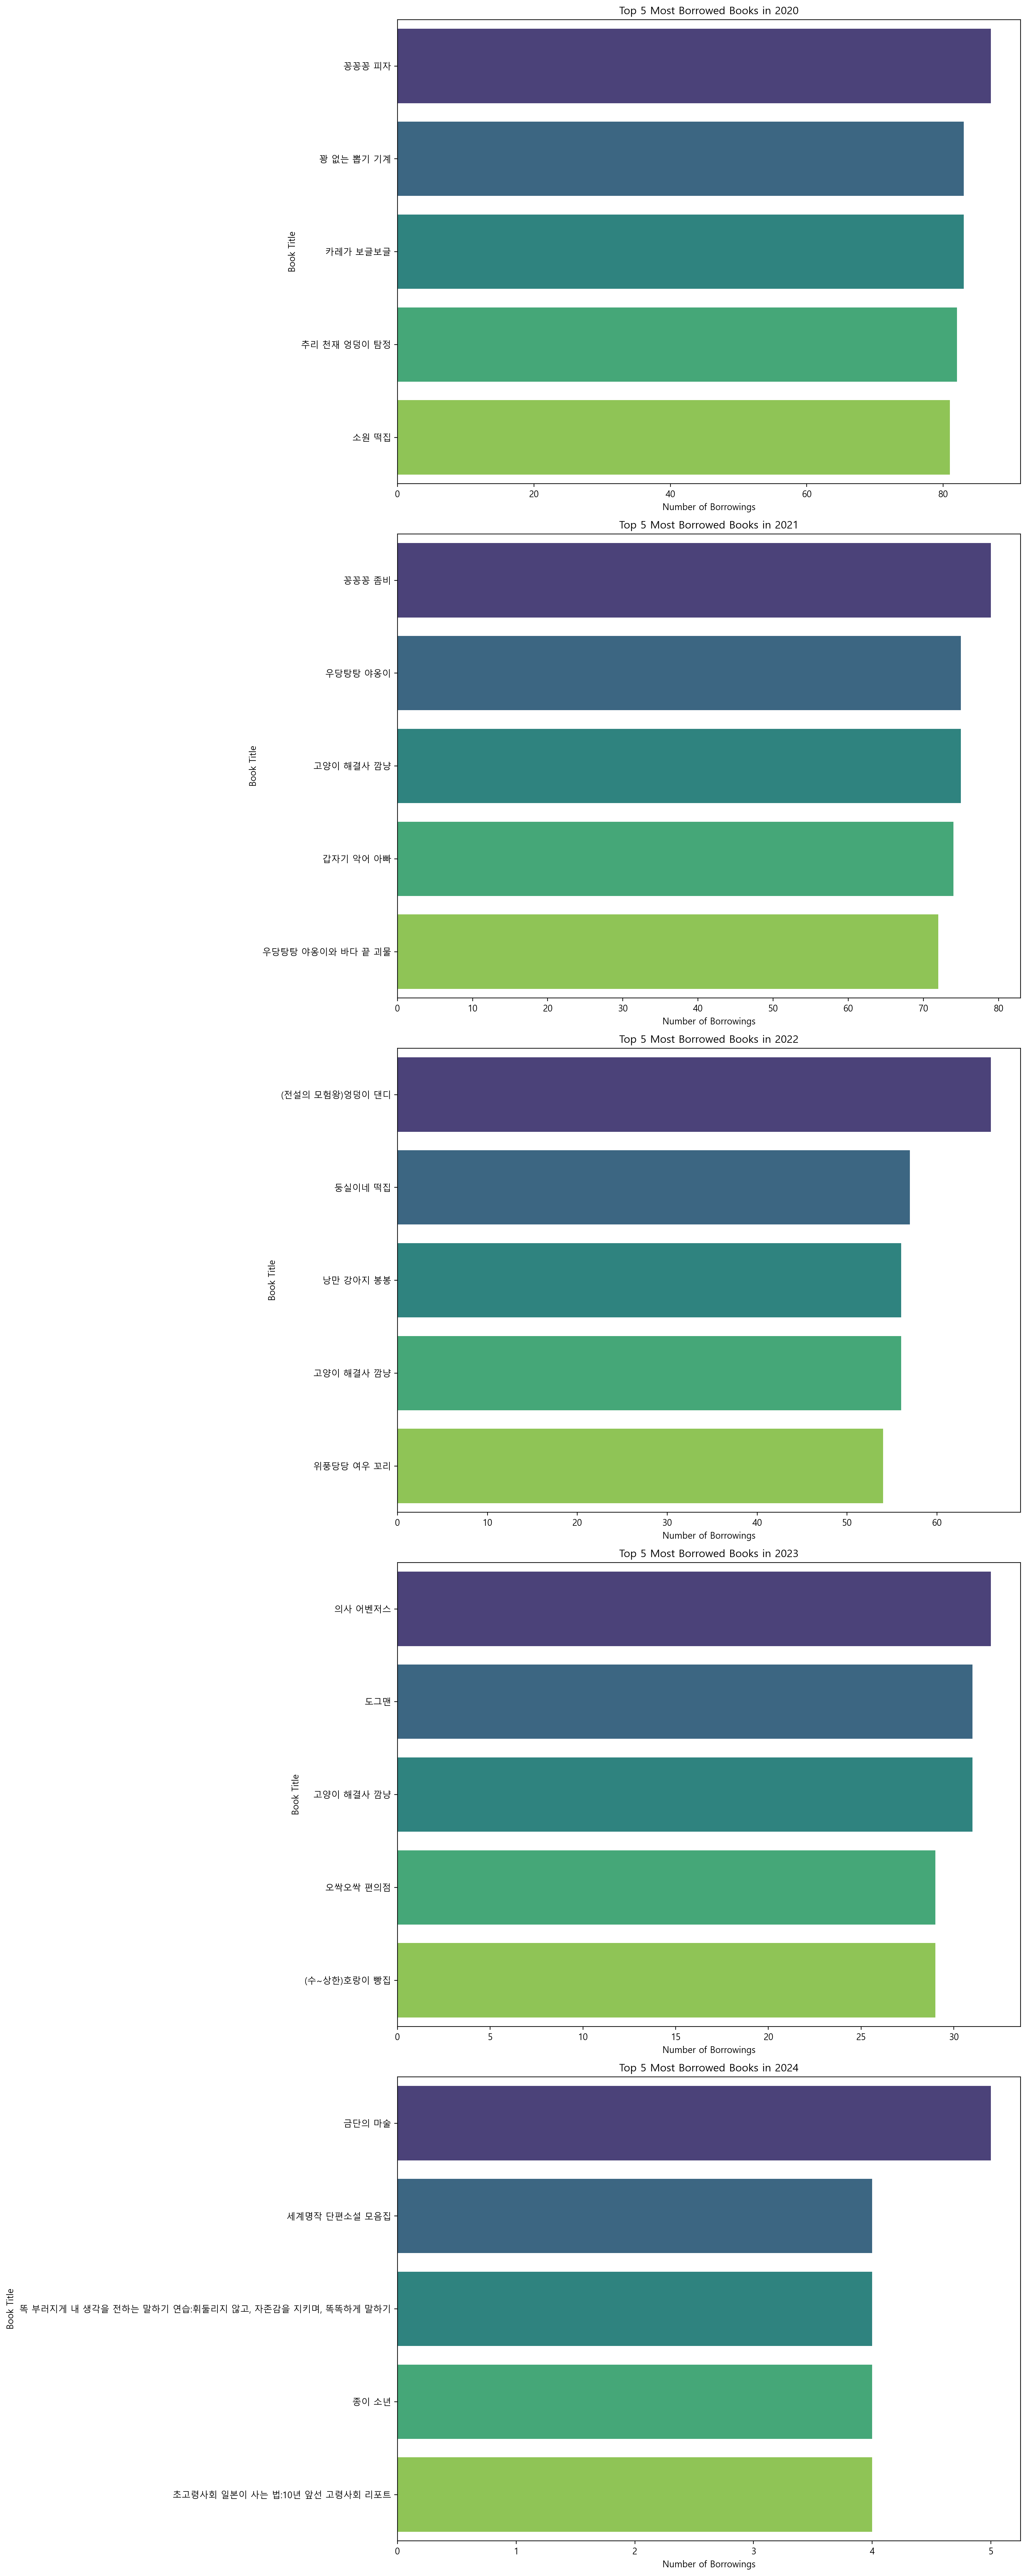

In [20]:

# '발행년도'를 정수형으로 변환
df['발행년도'] = pd.to_numeric(df['발행년도'], errors='coerce')

# 대출건수가 0보다 큰 도서만 선택
borrowed_books = df[df['대출건수'] > 0]

# 연도별 상위 5개 도서를 저장할 리스트
top_books_list = []

for year in range(2020, 2025):
    yearly_data = borrowed_books[borrowed_books['발행년도'] == year]
    if not yearly_data.empty:
        top_books = yearly_data.nlargest(5, '대출건수')
        top_books['연도'] = year  # 연도 컬럼 추가
        top_books_list.append(top_books)

# 시각화 설정
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(16, 40))

# 각 연도별로 그래프 생성
for i, top_books in enumerate(top_books_list):
    sns.barplot(ax=axes[i], x='대출건수', y='도서명', data=top_books, palette='viridis')
    axes[i].set_title(f'Top 5 Most Borrowed Books in {top_books["연도"].iloc[0]}')
    axes[i].set_xlabel('Number of Borrowings')
    axes[i].set_ylabel('Book Title')

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()